In [16]:
# Objective: predict total sales for every product and store in the next month.
# For that I need a monthly sales table and currently I have daily sales only.

from libs.simple_plotter import simple_heatmap
from libs.simple_data_manager import load_dataset
import pandas as pd
import datetime

DATA = pd.read_csv('./input/sales_train.csv')

print(DATA.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None


In [17]:
# shop_id = 31#shops_frequent.index[0]
# item_id = 5822#items_frequent.index[0] 22166

# df = DATA.query(f'shop_id=={shop_id} and item_id=={item_id}')
# df = DATA.query(f'shop_id=={shop_id}')
df = DATA.copy()

df['date'] = pd.to_datetime(df['date'], format="%d.%M.%Y")
df = df.set_index('date')
df = df.rename(columns={"item_cnt_day": "sales_number"})

sales = df.groupby(['date'], as_index=False)['sales_number'].sum()
sales['sales_number'] = sales['sales_number'].astype(int)

 # sales.describe()

# df = df.drop(columns=['shop_id', 'item_id', 'item_price', 'date_block_num'])
df = df.drop(columns=['shop_id', 'item_id', 'item_price', 'date_block_num'])

df

,sales_number
date,
2013-01-02 00:01:00,1.0
2013-01-03 00:01:00,1.0
2013-01-05 00:01:00,-1.0
2013-01-06 00:01:00,1.0
2013-01-15 00:01:00,1.0
...,...
2015-01-10 00:10:00,1.0
2015-01-09 00:10:00,1.0
2015-01-14 00:10:00,1.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109 entries, 2013-01-06 to 2015-02-01
Freq: W-SUN
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales_number  109 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB
None
            sales_number
date                    
2013-01-06      309691.0
2013-01-13      342693.0
2013-01-20      343045.0
2013-01-27      364515.0
2013-02-03      202789.0
...                  ...
2015-01-04      106045.0
2015-01-11      172492.0
2015-01-18      171614.0
2015-01-25      185172.0
2015-02-01      129261.0

[109 rows x 1 columns]


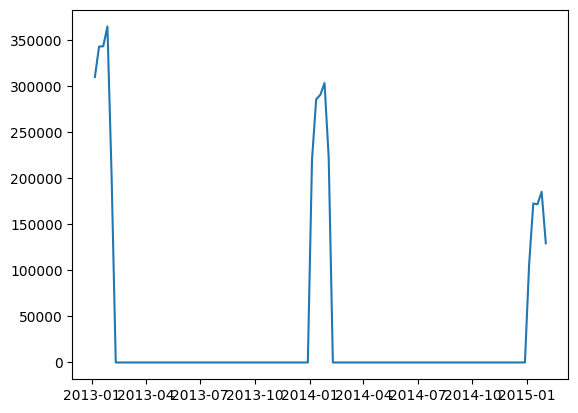

In [14]:
import matplotlib.pyplot as plt

# sales = sales_shop.drop(columns=['date_block_num'])

# resample data to weekly
resampled = df.resample('W')
weekly = resampled.sum()

print(weekly.info())
print(weekly)

fig, ax = plt.subplots()
ax.plot(weekly.sales_number)

In [15]:
weekly

,sales_number
date,
2013-01-06,309691.0
2013-01-13,342693.0
2013-01-20,343045.0
2013-01-27,364515.0
2013-02-03,202789.0
...,...
2015-01-04,106045.0
2015-01-11,172492.0
2015-01-18,171614.0


In [36]:
# podział danych na pliki wg sklepu i itemu

import pandas as pd
import os

DATA = pd.read_csv('./input/sales_train.csv')

# DATA = DATA[:10000]

shops = DATA['shop_id'].unique()
items = DATA['item_id'].unique()

dataset = []
count = len(shops)
files = 0

for shop_id in shops:
    print(f"{count} shops to go...")
    for item_id in items:
        res = DATA[ (DATA['shop_id'] == shop_id) & (DATA['item_id'] == item_id) ]
        if len(res) > 0:
            df = res[['date', 'item_cnt_day']].copy()
            # df = pd.DataFrame(data={res['date'], res['item_cnt_day']})
            df['date'] = pd.to_datetime(df['date'], format="%d.%M.%Y")
            df = df.set_index('date')
            df = df.rename(columns={"item_cnt_day": "sales_number"})
            folder = f"./output/shops_data/{shop_id}"
            if not os.path.exists(folder):
                os.mkdir(folder)
            filename = f"{folder}/{shop_id}_{item_id}.csv"
            df.to_csv(filename, index=True)
            files+=1
            # print(f"File {filename} saved...")
    count-=1

print(f"{files} files created.")
# unique_rows = DATA.drop_duplicates(subset=['shop_id', 'item_id'])
# print(unique_rows.shop_id, unique_rows.item_id)

# print(shops)
# print(items)



60 shops to go...


KeyboardInterrupt: 

In [39]:
# 59_17717
DATA = pd.read_csv('./output/shops_data/59/59_17717.csv')

DATA

,date,sales_number
0,2013-01-22 00:02:00,1.0
1,2013-01-12 00:02:00,1.0
2,2013-01-16 00:02:00,1.0
3,2013-01-17 00:11:00,2.0
4,2013-01-23 00:11:00,3.0
...,...,...
200,2015-01-17 00:10:00,1.0
201,2015-01-19 00:10:00,1.0
202,2015-01-21 00:10:00,1.0
203,2015-01-30 00:10:00,1.0


In [62]:
monthly_sales


,month_number,shop_id,item_id,monthly_sales
0,0,0,32,6
1,0,0,33,3
2,0,0,35,1
3,0,0,43,1
4,0,0,51,2
...,...,...,...,...
1609119,33,59,22087,6
1609120,33,59,22088,2
1609121,33,59,22091,1
1609122,33,59,22100,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   month_number   34 non-null     int64
 1   monthly_sales  34 non-null     int64
dtypes: int64(2)
memory usage: 672.0 bytes
None


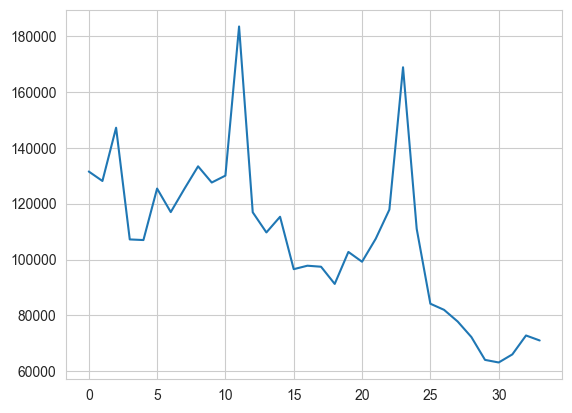

In [107]:
# Let's see summarized global sales amount per month, just to take a look at the global sales trends and seasons
# there is definitely seasonality and trends related to it.

import matplotlib.pyplot as plt

global_sales = monthly_sales.groupby(['month_number'], as_index=False)['monthly_sales'].sum()
print(global_sales.info())

fig, ax = plt.subplots()
ax.plot(global_sales.month_number, global_sales.monthly_sales)


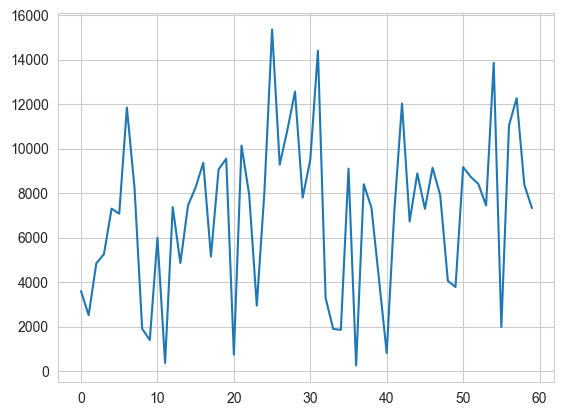

In [66]:
# The full data
# I want to extract that trend by using specific shop id or item id.
# And it looks like each shop has different amount of items,

items_in_shop = monthly_sales.copy()
items_in_shop = items_in_shop.drop(columns=['month_number', 'monthly_sales'])

res = items_in_shop.groupby(['shop_id'], as_index=False)['item_id'].nunique()

fig, ax = plt.subplots()
ax.plot(res.shop_id, res.item_id)

In [100]:
# Let's check which item and shop id are most frequently used.

items_frequent = monthly_sales['item_id'].value_counts()
shops_frequent = monthly_sales['shop_id'].value_counts()

print("shop id:", shops_frequent.index[0], "used times:", shops_frequent.values[0])  # 31
print("item id:", items_frequent.index[0], "used times:", items_frequent.values[0])  # 5822


shop id: 31 used times: 99241
item id: 5822 used times: 1452


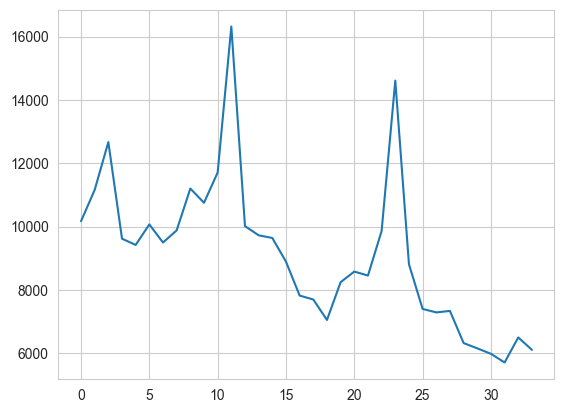

In [111]:
# Looks like the shop id is much better option - used almost 100K times
# Let's validate by drawing a global sales history for that shop

from pandas import DataFrame
import matplotlib.pyplot as plt

shop_id = shops_frequent.index[0]
# selected = monthly_sales.query('item_id==5822')
by_shop = monthly_sales.query(f'shop_id=={shop_id}')
sales_shop = by_shop.groupby(['month_number'], as_index=False)['monthly_sales'].sum()

fig, ax = plt.subplots()
ax.plot(sales_shop.month_number, sales_shop.monthly_sales)


In [108]:
# so, for quick training I will use by_shop table as it's much smaller than the original
import sys, imp
imp.reload(sys.modules['constants'])
from constants import preprocessed_data_small

by_shop.to_csv(preprocessed_data_small, index=False)

print("Done")


Done


In [109]:
from constants import preprocessed_data

monthly_sales.to_csv(preprocessed_data, index=False)

print("Done")

Done
